In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 避免产生报警告
import warnings 
warnings.filterwarnings('ignore')

## 任务1：报名比赛
- [X] 步骤1：报名比赛http://challenge.xfyun.cn/topic/info?type=diabetes&ch=ds22-dw-zmt05
- [X] 步骤2：下载比赛数据（点击比赛页面的赛题数据）
- [X] 步骤3：解压比赛数据，并使用pandas进行读取；
- [X] 步骤4：查看训练集和测试集字段类型，并将数据读取代码写到博客；

In [185]:
path = "G:/学习笔记/DataMinning/diabetes/糖尿病遗传风险预测挑战赛公开数据/"

train = pd.read_csv(path + "train.csv", encoding="gbk")
test = pd.read_csv(path + "test.csv", encoding="gbk")
example = pd.read_csv(path + "example.csv", encoding="gbk")

In [23]:
train.dtypes

编号            int64
性别            int64
出生年份          int64
体重指数        float64
糖尿病家族史       object
舒张压         float64
口服耐糖量测试     float64
胰岛素释放实验     float64
肱三头肌皮褶厚度    float64
患有糖尿病标识       int64
dtype: object

In [24]:
test.dtypes

编号            int64
性别            int64
出生年份          int64
体重指数        float64
糖尿病家族史       object
舒张压         float64
口服耐糖量测试     float64
胰岛素释放实验     float64
肱三头肌皮褶厚度    float64
dtype: object

## 任务2：比赛数据分析
- [X] 步骤1：统计字段的缺失值，计算缺失比例；
    - 通过缺失值统计，训练集和测试集的缺失值分布是否一致？
    - 通过缺失值统计，有没有缺失比例很高的列？


In [25]:
train.describe()

,编号,性别,出生年份,体重指数,舒张压,口服耐糖量测试,胰岛素释放实验,肱三头肌皮褶厚度,患有糖尿病标识
count,5070.000000,5070.000000,5070.000000,5070.000000,4823.000000,5070.000000,5070.000000,5070.000000,5070.000000
mean,2535.500000,0.456805,1986.869231,37.986785,89.423595,5.612839,4.114321,6.994371,0.381854
std,1463.727263,0.498180,8.919737,11.447095,9.266992,2.257649,8.726001,13.651442,0.485889
min,1.000000,0.000000,1943.000000,0.000000,30.000000,-1.000000,0.000000,0.000000,0.000000
25%,1268.250000,0.000000,1980.000000,28.400000,85.000000,4.314000,0.000000,0.000000,0.000000
50%,2535.500000,0.000000,1987.000000,36.550000,89.000000,5.760000,0.000000,0.000000,0.000000
75%,3802.750000,1.000000,1995.000000,47.600000,96.000000,7.193000,7.100000,4.120000,1.000000
max,5070.000000,1.000000,2009.000000,65.900000,126.000000,10.839000,108.960000,45.000000,1.000000


In [26]:
test.describe()

,编号,性别,出生年份,体重指数,舒张压,口服耐糖量测试,胰岛素释放实验,肱三头肌皮褶厚度
count,1000.000000,1000.000000,1000.000000,1000.000000,951.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,0.481000,1986.386000,39.439000,89.638275,5.872314,4.102700,7.064240
std,288.819436,0.499889,8.816163,11.284861,9.379124,1.930880,8.594005,13.900938
min,1.000000,0.000000,1958.000000,0.000000,28.000000,-1.000000,0.000000,0.000000
25%,250.750000,0.000000,1979.000000,29.975000,85.000000,4.516000,0.000000,0.000000
50%,500.500000,0.000000,1987.000000,38.900000,89.000000,5.851500,0.000000,0.000000
75%,750.250000,1.000000,1994.000000,48.950000,96.000000,7.465000,7.202500,3.820000
max,1000.000000,1.000000,2003.000000,60.000000,112.000000,10.613000,123.890000,44.900000


In [34]:
# 基本一致
train.isnull().mean() - test.isnull().mean()

体重指数        0.000000
出生年份        0.000000
口服耐糖量测试     0.000000
性别          0.000000
患有糖尿病标识          NaN
糖尿病家族史      0.000000
编号          0.000000
肱三头肌皮褶厚度    0.000000
胰岛素释放实验     0.000000
舒张压        -0.000282
dtype: float64

In [37]:
train.isnull().mean() # 没有缺失很多的列

编号          0.000000
性别          0.000000
出生年份        0.000000
体重指数        0.000000
糖尿病家族史      0.000000
舒张压         0.048718
口服耐糖量测试     0.000000
胰岛素释放实验     0.000000
肱三头肌皮褶厚度    0.000000
患有糖尿病标识     0.000000
dtype: float64

In [38]:
test.isnull().mean() # 没有缺失很多的列

编号          0.000
性别          0.000
出生年份        0.000
体重指数        0.000
糖尿病家族史      0.000
舒张压         0.049
口服耐糖量测试     0.000
胰岛素释放实验     0.000
肱三头肌皮褶厚度    0.000
dtype: float64

- [X] 步骤2：分析字段的类型；
    - 有多少数值类型、类别类型？
    - 你是判断字段类型的？在博客中通过文字写出你的判断；


In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5070 entries, 0 to 5069
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   编号        5070 non-null   int64  
 1   性别        5070 non-null   int64  
 2   出生年份      5070 non-null   int64  
 3   体重指数      5070 non-null   float64
 4   糖尿病家族史    5070 non-null   object 
 5   舒张压       4823 non-null   float64
 6   口服耐糖量测试   5070 non-null   float64
 7   胰岛素释放实验   5070 non-null   float64
 8   肱三头肌皮褶厚度  5070 non-null   float64
 9   患有糖尿病标识   5070 non-null   int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 396.2+ KB


In [45]:
train.head()

,编号,性别,出生年份,体重指数,糖尿病家族史,舒张压,口服耐糖量测试,胰岛素释放实验,肱三头肌皮褶厚度,患有糖尿病标识
0,1,0,1996,30.1,无记录,106.0,3.818,7.89,0.0,0
1,2,0,1988,27.5,无记录,84.0,-1.000,0.00,14.7,0
2,3,1,1988,36.5,无记录,85.0,7.131,0.00,40.1,1
3,4,1,1992,29.5,无记录,91.0,7.041,0.00,0.0,0
4,5,0,1998,42.0,叔叔或者姑姑有一方患有糖尿病,NaN,7.134,0.00,0.0,1


- **类别变量：** 性别、糖尿病家族史
- **数值变量：** 出生年份、体重指数、舒张压、口服耐糖量测试、胰岛素释放实验、肱三头肌皮褶厚度
- **标签0-1：** 患有糖尿病标识

首先通过变量的数据类型，先大致判断是什么类别，再打印详细的样本进一步确认.

- [X] 步骤3：计算字段相关性；
    - 通过.corr()计算字段之间的相关性；
    - 有哪些字段与标签的相关性最高？
    - 尝试使用其他可视化方法将字段 与 标签的分布差异进行可视化；

In [50]:
train.corr()

,编号,性别,出生年份,体重指数,舒张压,口服耐糖量测试,胰岛素释放实验,肱三头肌皮褶厚度,患有糖尿病标识
编号,1.000000,0.006603,-0.006693,0.000028,0.003495,-0.005840,0.020441,0.030330,0.027435
性别,0.006603,1.000000,-0.119563,0.075186,0.078870,0.011463,-0.053597,0.014037,0.031480
出生年份,-0.006693,-0.119563,1.000000,-0.074603,-0.154631,0.002085,0.058585,-0.013111,-0.068225
体重指数,0.000028,0.075186,-0.074603,1.000000,0.159903,-0.001796,-0.034507,0.026321,0.377919
舒张压,0.003495,0.078870,-0.154631,0.159903,1.000000,-0.020317,-0.206663,0.076147,0.157421
口服耐糖量测试,-0.005840,0.011463,0.002085,-0.001796,-0.020317,1.000000,0.093715,-0.006483,0.178133
胰岛素释放实验,0.020441,-0.053597,0.058585,-0.034507,-0.206663,0.093715,1.000000,-0.015479,0.156656
肱三头肌皮褶厚度,0.030330,0.014037,-0.013111,0.026321,0.076147,-0.006483,-0.015479,1.000000,0.410667
患有糖尿病标识,0.027435,0.031480,-0.068225,0.377919,0.157421,0.178133,0.156656,0.410667,1.000000


D:\conda3\envs\torch38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\conda3\envs\torch38\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


<AxesSubplot:>

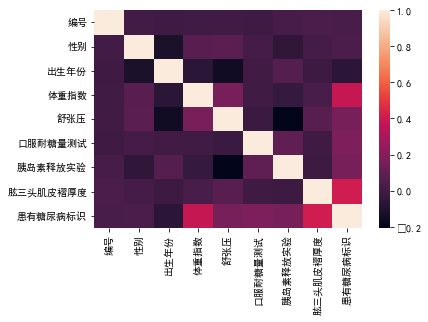

In [49]:
sns.set_style({'font.sans-serif':['SimHei','Arial']})
sns.heatmap(train.corr())

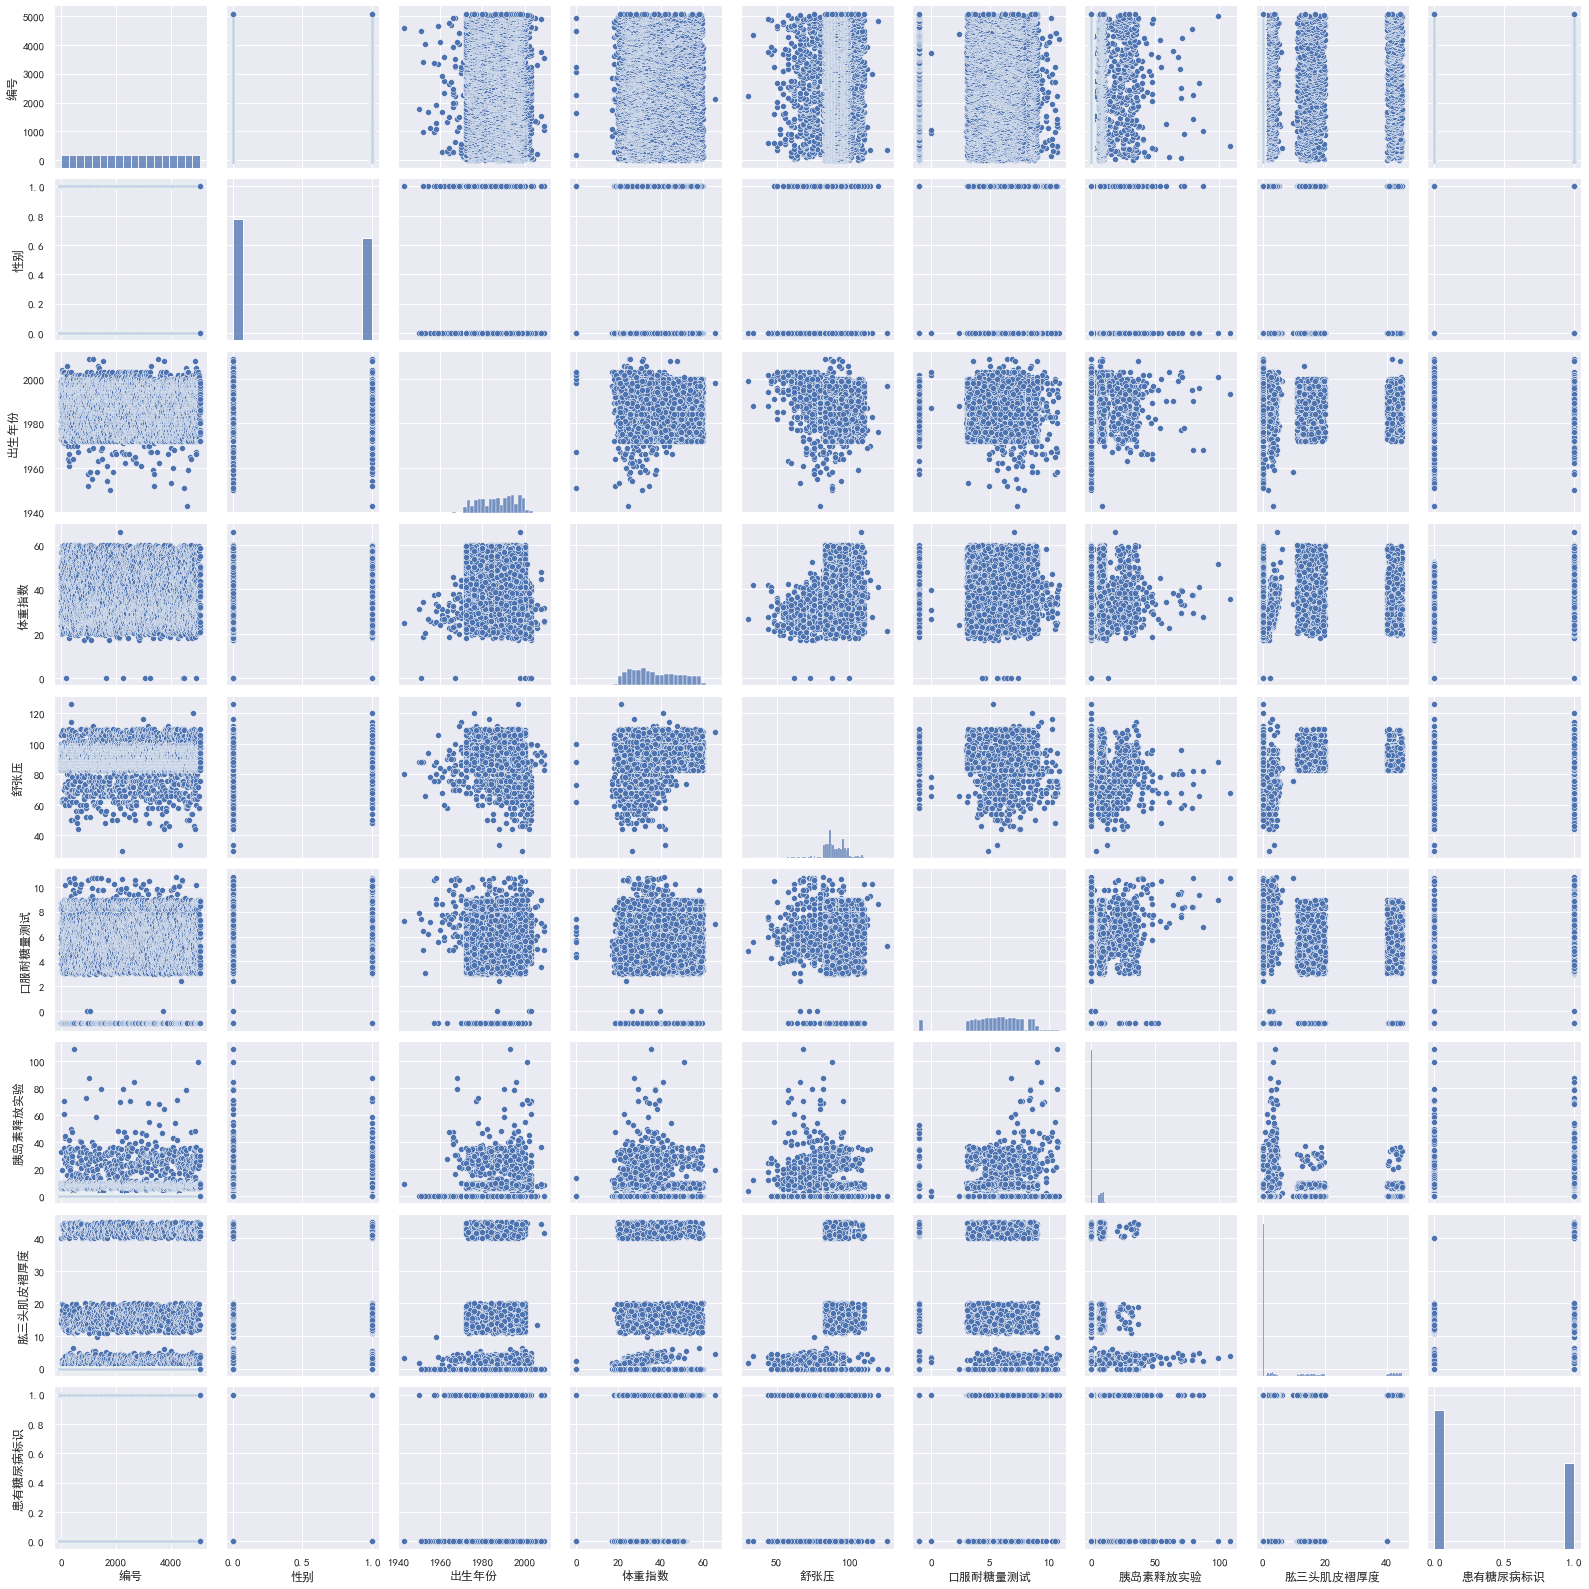

In [54]:
sns.set()
cols = train.columns # 罗列出数据集的所有列
sns.pairplot(train[cols], size = 2.5) # 成对画出任意两列的散点图
sns.set_style({'font.sans-serif':['SimHei','Arial']})
plt.show() # 显示函数

<AxesSubplot:ylabel='患有糖尿病标识'>

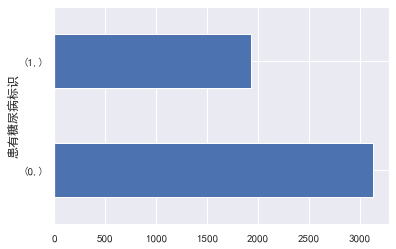

In [69]:
# 标签不太均衡
train[['患有糖尿病标识']].value_counts().plot(kind='barh')

<AxesSubplot:>

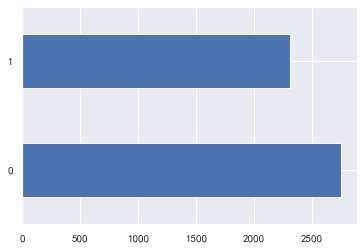

In [68]:
train['性别'].value_counts().plot(kind='barh')

<AxesSubplot:xlabel='患有糖尿病标识', ylabel='count'>

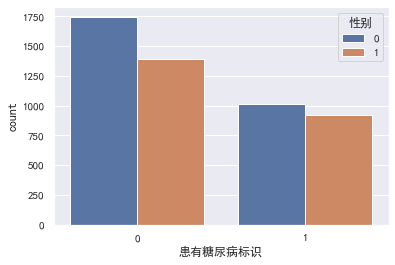

In [70]:
sns.countplot(x='患有糖尿病标识', hue='性别', data=train)

<AxesSubplot:xlabel='患有糖尿病标识', ylabel='出生年份'>

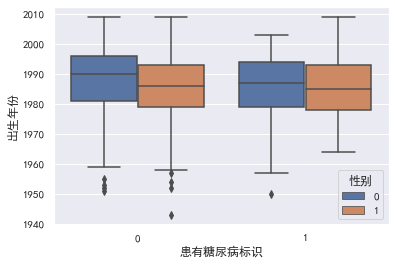

In [71]:
sns.boxplot(y='出生年份', x='患有糖尿病标识', hue='性别', data=train)

<AxesSubplot:xlabel='患有糖尿病标识', ylabel='体重指数'>

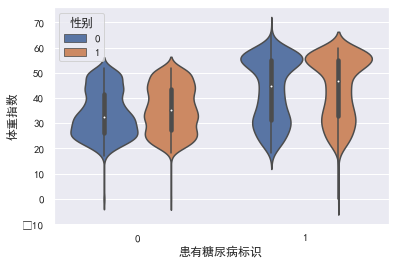

In [73]:
sns.violinplot(y='体重指数', x='患有糖尿病标识', hue='性别', data=train)

## 任务3：逻辑回归尝试

- [X] 步骤1：导入sklearn中的逻辑回归；
- [X] 步骤2：使用训练集和逻辑回归进行训练，并在测试集上进行预测；
- [X] 步骤3：将步骤2预测的结果文件提交到比赛，截图分数；
- [X] 步骤4：将训练集20%划分为验证集，在训练部分进行训练，在测试部分进行预测，调节逻辑回归的超参数；
- [X] 步骤5：如果精度有提高，则重复步骤2和步骤3；如果没有提高，可以尝试树模型，重复步骤2、3；

In [83]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [88]:
X_train, X_test, y_train, y_test = train_test_split(train, train['患有糖尿病标识'], test_size=0.4, random_state=42)

In [87]:
train.columns

Index(['编号', '性别', '出生年份', '体重指数', '糖尿病家族史', '舒张压', '口服耐糖量测试', '胰岛素释放实验',
       '肱三头肌皮褶厚度', '患有糖尿病标识'],
      dtype='object')

In [135]:
grade_mapping = {'无记录': 0,
                 '叔叔或者姑姑有一方患有糖尿病': 1,
                 '叔叔或姑姑有一方患有糖尿病': 1, 
                 '父母有一方患有糖尿病': 2}
# train["糖尿病家族史"] = train["糖尿病家族史"].fillna(2)
train['糖尿病家族史'] = train['糖尿病家族史'].map(grade_mapping)

train['舒张压'] = train['舒张压'].fillna(train['舒张压'].mean())

In [121]:
rgf_1 = linear_model.LogisticRegression()

X_train = train[['性别', '出生年份', '体重指数', '糖尿病家族史', '舒张压', '口服耐糖量测试', '胰岛素释放实验', '肱三头肌皮褶厚度']]
y_train = train['患有糖尿病标识']

rgf_1.fit(X_train, y_train)

LogisticRegression()

In [126]:
rgf_1.score(X_train, y_train)

0.8151873767258383

对测试集做处理

In [136]:
grade_mapping = {'无记录': 0,
                 '叔叔或者姑姑有一方患有糖尿病': 1,
                 '叔叔或姑姑有一方患有糖尿病': 1, 
                 '父母有一方患有糖尿病': 2}
# train["糖尿病家族史"] = train["糖尿病家族史"].fillna(2)
test['糖尿病家族史'] = test['糖尿病家族史'].map(grade_mapping)

test["舒张压"] = test["舒张压"].fillna(test["舒张压"].mean())

In [141]:
test = test.drop("编号", axis = 1)

In [145]:
result = rgf_1.predict(test)

In [146]:
example["label"] = result

In [147]:
example

,uuid,label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
995,996,0
996,997,1
997,998,0
998,999,1


In [149]:
example.to_csv("result_20220717_1819.csv")

提交得分：

<img src="LR_result.png">

In [150]:
def process_dataset(df):
    grade_mapping = {'无记录': 0,
                 '叔叔或者姑姑有一方患有糖尿病': 1,
                 '叔叔或姑姑有一方患有糖尿病': 1, 
                 '父母有一方患有糖尿病': 2}
    df['糖尿病家族史'] = df['糖尿病家族史'].map(grade_mapping)
    
    df["舒张压"] = df["舒张压"].fillna(df["舒张压"].mean())
    
    df = df.drop("编号", axis = 1)
    
    return df

In [152]:
train = process_dataset(train)

In [153]:
X_train, X_test, y_train, y_test = train_test_split(train.drop("患有糖尿病标识", axis = 1), 
                                                    train['患有糖尿病标识'], 
                                                    test_size=0.2, random_state=42)

In [175]:
rcf_2 = linear_model.LogisticRegression(C=0.8)
rcf_2.fit(X_train, y_train)

LogisticRegression(C=0.8)

In [159]:
rcf_2.score(X_test, y_test)

0.8047337278106509

In [161]:
linear_model.LogisticRegression?

In [176]:
from sklearn.metrics import f1_score
f1_score(rcf_2.predict(X_test), y_test)

0.7290233837689134

In [203]:
def output(model, filename):
    path = "G:/学习笔记/DataMinning/diabetes/糖尿病遗传风险预测挑战赛公开数据/"
    data = pd.read_csv(path + "test.csv", encoding="gbk")
    
    data = process_dataset(data)
    result = model.predict(data)
    example = pd.read_csv(path + "example.csv", encoding="gbk")
    
    example["label"] = result
    example.to_csv(filename + ".csv")

In [187]:
output(rcf_2, "20220717_2038")

### `LogisticRegression`参数说明
- `penalty`：惩罚项，可为’l1’ or ‘l2’。‘netton-cg’, ‘sag’, ‘lbfgs’只支持’l2’。

    - ‘l1’正则化的损失函数不是连续可导的，而’netton-cg’, ‘sag’, 'lbfgs’这三种算法需要损失函数的一阶或二阶连续可导。
    - 调参时如果主要是为了解决过拟合，选择’l2’正则化就够了。若选择’l2’正则化还是过拟合，可考虑’l1’正则化。
    - 若模型特征非常多，希望一些不重要的特征系数归零，从而让模型系数化的话，可使用’l1’正则化。

- `dual`：选择目标函数为原始形式还是对偶形式。
将原始函数等价转化为一个新函数，该新函数称为对偶函数。对偶函数比原始函数更易于优化。

- `tol`：优化算法停止的条件。当迭代前后的函数差值小于等于tol时就停止。

- `C`：正则化系数。其越小，正则化越强。

- `fit_intercept`：选择逻辑回归模型中是否会有常数项b
- `class_weight`：用于标示分类模型中各种类型的权重，{class_label: weight} or ‘balanced’。
    - ‘balanced’：类库根据训练样本量来计算权重。某种类型的样本量越多，则权重越低。
    - 若误分类代价很高，比如对合法用户和非法用户进行分类，可适当提高非法用户的权重
    - 样本高度失衡的。如合法用户9995条，非法用户5条，可选择’balanced’，让类库自动提高非法用户样本的权重。
- `random_state`：随机数种子。

- solver：逻辑回归损失函数的优化方法。
    - ‘liblinear’：使用坐标轴下降法来迭代优化损失函数。
    - ‘lbfgs’：拟牛顿法的一种。利用损失函数二阶导数矩阵即海森矩阵来迭代优化损失函数。
    - ‘newton-cg’：牛顿法的一种。同上。
    - ‘sag’：随机平均梯度下降。每次迭代仅仅用一部分的样本来计算梯度，适合于样本数据多的时候。
    - 多元逻辑回归有OvR(one-vs-rest)和MvM(many-vs-many)两种，而MvM一般比OvR分类相对准确一些。但是，'liblinear’只支持OvR。

- `max_iter`：优化算法的迭代次数。

- `multi_class`：‘ovr’ or ‘multinomial’。'multinomial’即为MvM。

    - 若是二元逻辑回归，二者区别不大。
    - 对于MvM，若模型有T类，每次在所有的T类样本里面选择两类样本出来，把所有输出为该两类的样本放在一起，进行二元回归，得到模型参数，一共需要T(T-1)/2次分类。

- `verbose`：控制是否print训练过程。
- `n_jobs`：用cpu的几个核来跑程序。


### 树模型

In [197]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth = 5)

In [198]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [200]:
f1_score(clf.predict(X_test), y_test)

0.9365482233502538

#### 决策树实际使用技巧
- 对于拥有大量特征的数据决策树会出现过拟合的现象。获得一个合适的样本比例和特征数量十分重要，因为在高维空间中只有少量的样本的树是十分容易过拟合的。
- 考虑事先进行降维( PCA , ICA ，使您的树更好地找到具有分辨性的特征。
- 通过 export 功能可以可视化您的决策树。使用 max_depth=3 作为初始树深度，让决策树知道如何适应您的数据，然后再增加树的深度。
请记住，填充树的样本数量会增加树的每个附加级别。使用 max_depth 来控制输的大小防止过拟合。
- 通过使用 min_samples_split 和 min_samples_leaf 来控制叶节点上的样本数量。当这个值很小时意味着生成的决策树将会过拟合，然而当这个值很大时将会不利于决策树的对样本的学习。所以尝试 min_samples_leaf=5 作为初始值。如果样本的变化量很大，可以使用浮点数作为这两个参数中的百分比。两者之间的主要区别在于 min_samples_leaf 保证叶结点中最少的采样数，而 min_samples_split 可以创建任意小的叶子，尽管在文献中 min_samples_split 更常见。
- 在训练之前平衡您的数据集，以防止决策树偏向于主导类.可以通过从每个类中抽取相等数量的样本来进行类平衡，或者优选地通过将每个类的样本权重 (sample_weight) 的和归一化为相同的值。还要注意的是，基于权重的预修剪标准 (min_weight_fraction_leaf) 对于显性类别的偏倚偏小，而不是不了解样本权重的标准，如 min_samples_leaf 。
- 如果样本被加权，则使用基于权重的预修剪标准 min_weight_fraction_leaf 来优化树结构将更容易，这确保叶节点包含样本权重的总和的至少一部分。
- 所有的决策树内部使用 np.float32 数组 ，如果训练数据不是这种格式，将会复制数据集。
- 如果输入的矩阵X为稀疏矩阵，建议您在调用fit之前将矩阵X转换为稀疏的csc_matrix ,在调用predict之前将 csr_matrix 稀疏。当特征在大多数样本中具有零值时，与密集矩阵相比，稀疏矩阵输入的训练时间可以快几个数量级。

In [204]:
output(clf, "20220717_2105_93654")

## 任务4：特征工程（使用pandas完成）

- [X] 步骤1：统计每个性别对应的【体重指数】、【舒张压】平均值
- 步骤2：计算每个患者与每个性别平均值的差异；
- 步骤3：在上述基础上将训练集20%划分为验证集，使用逻辑回归完成训练，精度是否有提高？
- 步骤4：思考字段含义，尝试新的特征，将你的尝试写入博客；

In [211]:
train.groupby("性别")["体重指数", "舒张压"].mean()

,体重指数,舒张压
性别,,
0,37.197603,88.755141
1,38.925216,90.222576
